In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [19]:
data = pd.read_csv('dermatology_csv.csv')
data.head()
X = data.iloc[:,:34]

y = data.iloc[:,-1]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy ='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X = pd.DataFrame(X)

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X,y)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_predicted = clf.predict(X)

In [23]:
clf.score(X,y)

0.9863387978142076

In [24]:
clf.predict_proba(X)

array([[1.48039247e-04, 9.81527913e-01, 5.24470479e-04, 1.22998836e-02,
        5.49633050e-03, 3.36364647e-06],
       [9.82174097e-01, 4.69652709e-03, 1.04882135e-03, 1.00387331e-05,
        3.78563756e-04, 1.16919522e-02],
       [1.00404867e-04, 3.97592837e-03, 9.95253231e-01, 6.77889411e-05,
        2.84181412e-04, 3.18465230e-04],
       ...,
       [2.56170599e-04, 1.87906364e-05, 9.99033514e-01, 4.79719827e-04,
        8.10557721e-05, 1.30748782e-04],
       [9.54963565e-04, 1.24796461e-05, 9.93871766e-01, 4.82223037e-03,
        3.37599550e-04, 9.61325215e-07],
       [9.99710933e-01, 5.93459273e-07, 1.15490118e-04, 4.61637316e-05,
        5.27342425e-05, 7.40851541e-05]])

In [25]:
cm = confusion_matrix(y,y_predicted)
cm

array([[112,   0,   0,   0,   0,   0],
       [  0,  59,   0,   2,   0,   0],
       [  0,   0,  72,   0,   0,   0],
       [  0,   3,   0,  46,   0,   0],
       [  0,   0,   0,   0,  52,   0],
       [  0,   0,   0,   0,   0,  20]])

Text(69.0, 0.5, 'Truth')

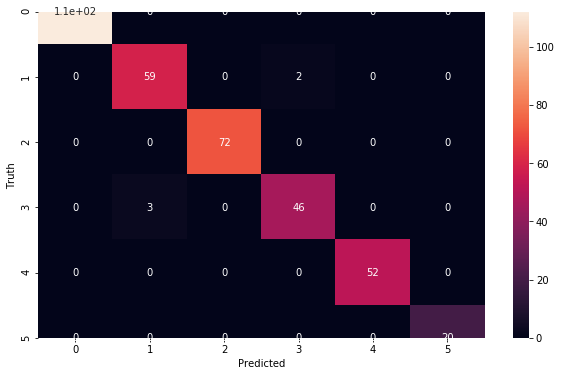

In [26]:
plt.figure(figsize = (10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')

plt.ylabel('Truth')